# Assignment-1 Tomas Alessi

1. Creating a Random Network

    1.1 Creating a Random Network as an Adjacency Matrix
   
    1.2 Creating a graph-tool Graph from the Adjacency Matrix

2. Network Representations

    2.1 Saving the Network as an Edge List in .tsv file format
    
    2.2 Saving the Network as an METIS file in .metis file format
    
    2.3 Saving the Network as an graphML file in .graphml file format

3. Metrics

    3.1 Ploting the Degree Distribuition of the Network

    3.2 Couting the number of Isolated Nodes in the Network

    3.1 Counting the number of Connected Components in the Network


## 1. Creating a random Network 

Libraries used:

- **numpy**

- **graph-tool** (installed locally using conda)

- **scipy**

- **matplotlib**


### Creating a Random Network, represented by an Adjacency Matrix

The core ideia will be to:

    set nodes as the number of nodes in the Network
    
    set p as the probability that pair of nodes will connect

Iterating through every pair once, (as it is an undirected graph) we will count (i,j) and (j,i) as the same pair

For every pair, setting a random_probability between 0 and 1.

if random_probability <= p, than create an edge between i and j



Setting the number of nodes 

In [818]:
# setting the number of nodes 
nodes = 1000

Calculating what would be the maximum number of edges

In [819]:
nodes * (nodes-1) / 2

499500.0

Seting up a (p) probability that will likely result in a random network with 10,000 edges 

(I will confirm that the network has 10,000 edges after)

In [820]:
p = 1/40

An estimate of how many edges this network on avarege will have

In [821]:
p * nodes * (nodes-1) / 2

12487.5

Creating the adjacency matrix structure for the random network

In [822]:
network_matrix = []

for i in range(nodes):
    row = []
    for j in range(nodes):
        row.append(0)
    network_matrix.append(row)

Creating the edges between pairs of nodes

In [823]:
# !pip install numpy

Populating the adjacency matrix

In [824]:
from numpy import random

# iterating through every pair of nodes one time
# pairs i,j are being considered equal to pair j,i
for i in range(len(network_matrix)):
    for j in range(i+1, len(network_matrix[0])):
        # generate a random number between 0 and 1
        random_prob = random.rand()
        # if the random number is less or equal to p probability
        if random_prob <= p:    
            # add an edge
            # is a non directed graph, so the two nodes have the connection
            network_matrix[i][j] = 1
            network_matrix[j][i] = 1
 

Creating a function to calculate the total number of edges in the network

In [825]:
def count_edges(adjacency_matrix):
    count = 0
    # iterating through every unique pair combination
    for i in range(len(adjacency_matrix)):
        for j in range(i+1, len(adjacency_matrix[0])):
            # if there is an edge between i and j
            if adjacency_matrix[i][j] == 1:
                count += 1
    return count

Real number of edges

In [826]:
network_edges = count_edges(network_matrix)
print(network_edges)

12363


### Creating a graph from graph-tool library using the adjacency matrix

In [827]:
from graph_tool.all import *
import scipy

In [828]:
from graph_tool.all import *
import scipy
ug_random_network = Graph(scipy.sparse.lil_matrix(network_matrix),directed=False)

Graph visualization

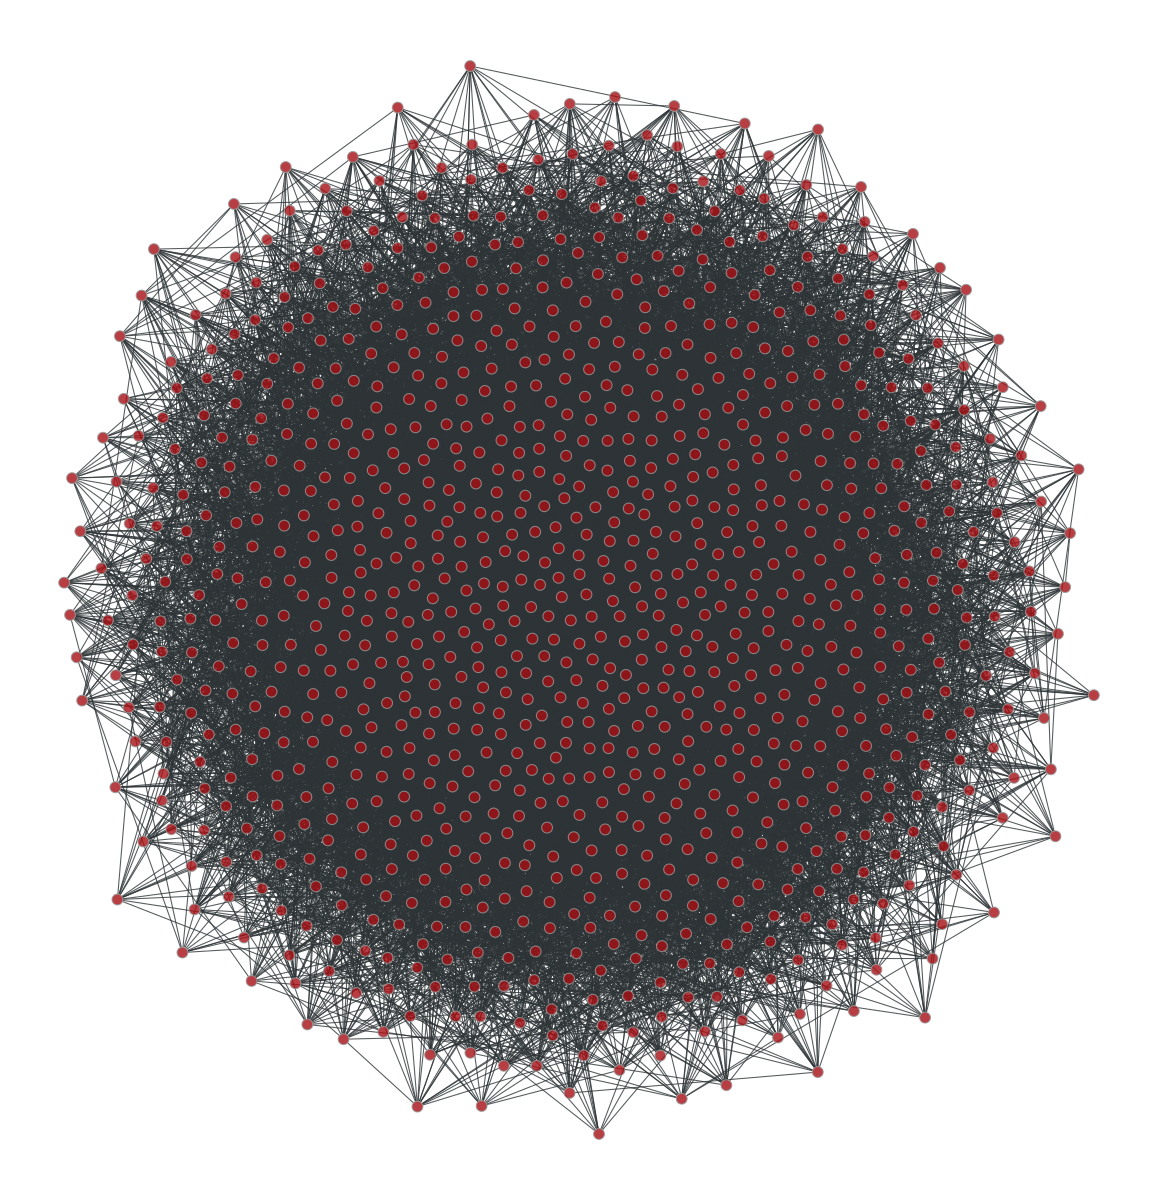

In [829]:
_ = graph_draw(ug_random_network, bg_color="white")

## 2. Network representations

### Saving the network as an edge list in a .tsv file

An edge list is a representation of all the network edges

When saving it as a .tsv file format (tab separated values), an example of the output would be:



\begin{array}{cc}
i_1 & j_2 \\
i_2 & j_4 \\
i_2 & j_7 \\
. & . \\
. & . \\
i_x & j_y\\
\end{array}


Where every line represent a network edge between index i and j

As it is an undirected graph, and edge (i, j) will not only represent a connection from i to j but also from j to i. 

That means that we don't need to represent the edge two times, "i j" and "j i".

In this representation, I will be indexing in 0 the vertices

In [830]:
filepath = "edge-list.tsv"

# itereating to every pair once, where (i, j) is considered the same pair as (j,i)
with open(filepath, 'w') as f:
    for i in range(len(network_matrix)):
        for j in range(i+1, len(network_matrix[1])):
            # if there is a connection
            if network_matrix[i][j] == 1:
                # writting index i tab index j 
                f.write(f"{i}\t{j}\n")



### Saving the network as a METIS file

Metis file has the following structure:


    "Number of nodes" "Number of Edges"

    Neighboors of vertex 1

    Neighboors of vertex 2

    Neighboors of vertex 3

                        .

                        .

                        .

    Neighboors of vertex N

METIS file is indexed in 1, so for this representation the vertices will be indexed in 1

References for the METIS file strucute: 

https://people.sc.fsu.edu/~jburkardt/data/metis_graph/metis_graph.html

https://conservancy.umn.edu/server/api/core/bitstreams/4450f49b-2783-4a4e-b1a9-65cda2b403ac/content, at page 13

Creating the METIS file representation, from the graph-tool graph

In [831]:
filepath = "network-ug.metis"


with open(filepath, 'w') as f:
    # writing the number of vertices and the edges in the network
    f.write(f"{ug_random_network.num_vertices()} {ug_random_network.num_edges()}\n")
    # iterating through the vertices
    for v in ug_random_network.vertices():
        # list that represents a row in the file contanning the neighboors
        neighboors = []
        # iterating through every neighboor
        for n in v.out_neighbors():
            # appending the neighboor, as a string to neighboors list
            # incrementing the vertex value, because it should be indexed in 1
            neighboors.append(str(int(n)+1))

        # appending the break line, as here we have finished all the neighboors of the vertex
        neighboors.append("\n")
        # joing the list values separated by a space and writting on the file
        f.write(" ".join(neighboors))



An example of how could it be done without using the graph-tool library

In [832]:
filepath = "raw-network.metis"

with open(filepath, 'w') as f:
    # writting the number of nodes and the number of edges    
    f.write(f"{nodes} {network_edges}\n")
    # iterating through every pair, where (i, j) and (i, j) will be considered different pairs
    # iterating through every vertex
    for i in range(len(network_matrix)):
        neighboors = []
        # iterating through every vertex
        for j in range(len(network_matrix[0])):
            # if the vertex i and j are not the same, an there is an edge connection
            if j != i and network_matrix[i][j] == 1:
                # add the neighboor
                neighboors.append(str(j+1))
        # add the break line
        neighboors.append("\n")
        # write the neighoors and the break line in the file separeted by space
        f.write(" ".join(neighboors))

### Saving the network as a graphML file

In [833]:
path_file = "network.grapml"
ug_random_network.save(path_file, fmt="graphml")

## 3. Metrics

### Degree Distribuiton

In [834]:
#!pip install matplotlib

In [835]:
# lisitng as the nodes degrees
degree_list = ug_random_network.get_out_degrees(ug_random_network.get_vertices())
degree_list.sort()
degree_list

array([11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21

Creating the degree distribuition figure

In [836]:
import matplotlib.pyplot as plt

In [837]:
plt.figure(figsize=(10,7),dpi=1000)
plt.hist(degree_list, bins= 30, edgecolor = 'black')
plt.title("Degree Distribuition")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show() 

### Number of isolated nodes

In [838]:
# count how many nodes have 0 degree, from the degrees list
number_isolated_nodes = 0

for dg in degree_list:
    if dg == 0:
        number_isolated_nodes += 1

In [839]:
print(number_isolated_nodes)

0


The number of isolated nodes in the network is:

In [840]:
print(f"Number of isolated nodes: {number_isolated_nodes}")

Number of isolated nodes: 0


### Number of connected components

In [841]:
comp, hist =  label_components(ug_random_network, directed=False)

Hist represents the "Histogram of component labels"

So its lenght represents the total of connected components

In [842]:
len(hist)

1

The number of connected components in this network is:

In [843]:
print(f"Number of connected components: {len(hist)}")

Number of connected components: 1
